# "Recreating the BBC style graphic in Python - `plotnine` and `altair`"
> BBC R graphics cookbook? This is an attempt to reproduce https://bbc.github.io/rcookbook/ in python


- toc: true 
- badges: true
- comments: true
- categories: [python]
- hide: trues

# Todo
- [ ] Missing Subtitle (plotnine)
- [ ] Missing Style

# Difference between plotnine and ggplot
99% of them are the same, except that in python you have to wrap column names in `''`, otherwise it will be treated as variable and caused error. Most of the time you just need to wrap a `''` or replaced with `_` depends on the function.

I tried to produce the same chart with `plotnine` and `altair`, and hopefully you will see their difference. `plotnine` covers 99% of `ggplot2`, so if you are coming from R, just go ahead with `plotnine`! `altair` is another interesting visualization library that base on vega-lite, therefore it can be integrated with website easily. In addition, it can also produce interactive chart with very simple function, which is a big plus!  

# Setup

In [3]:
# collapse-hide
# !pip install plotnine[all]
# !pip install altair
# !pip install gapminder

from gapminder import gapminder
from plotnine.data import mtcars
from plotnine import *
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap, geom_line
from plotnine import ggplot  # https://plotnine.readthedocs.io/en/stable/
import altair as alt
import pandas as pd
import plotnine
%matplotlib inline

  Using cached https://files.pythonhosted.org/packages/19/da/4d2f68e7436e76a3c26ccd804e1bfc5c58fca7a6cba06c71bab68b25e825/plotnine-0.6.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/e5/b6/1ed2eb03989ae574584664985367ba70cd9cf8b32ee8cad0e8aaeac819f3/descartes-1.1.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/e3/76/7a2c9094547ee592f9f43f651ab824aa6599af5e1456250c3f4cc162aece/mizani-0.6.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/94/4c/e6c3ba02dc66278317778b5c5df7b372c6c5313fce43615a7ce7fc0b34b8/scikit_misc-0.1.1-cp37-cp37m-win_amd64.whl


In [4]:
print(f'altair version: {alt.__version__}')
print(f'plotnine version: {plotnine.__version__}')
print(f'pandas version: {pd.__version__}')

altair version: 4.1.0
plotnine version: 0.6.0
pandas version: 1.0.3


## Plotnine Example

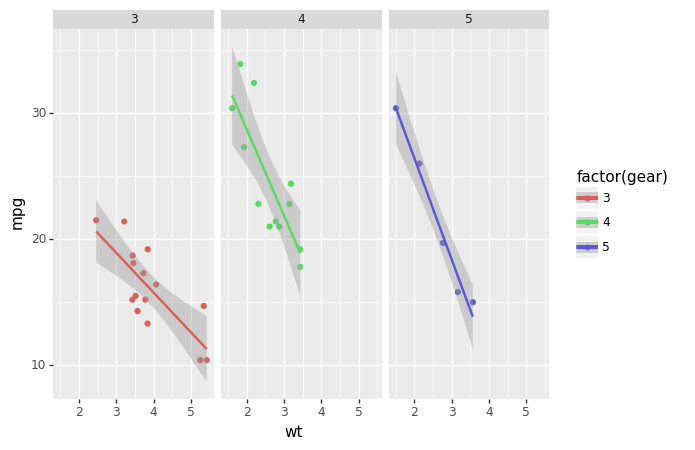

<ggplot: (-9223371941312347920)>

In [5]:
(ggplot(mtcars, aes('wt', 'mpg', color='factor(gear)'))
 + geom_point()
 + stat_smooth(method='lm')
 + facet_wrap('~gear'))


# Make a Line Chart


## ggplot
```r
line_df <- gapminder %>%
  filter(country == "Malawi") 

#Make plot
line <- ggplot(line_df, aes(x = year, y = lifeExp)) +
  geom_line(colour = "#1380A1", size = 1) +
  geom_hline(yintercept = 0, size = 1, colour="#333333") +
  bbc_style() +
  labs(title="Living longer",
       subtitle = "Life expectancy in Malawi 1952-2007")
```

In [6]:
#hide
line_df = gapminder.query(" country == 'Malawi' ")

## plotnine

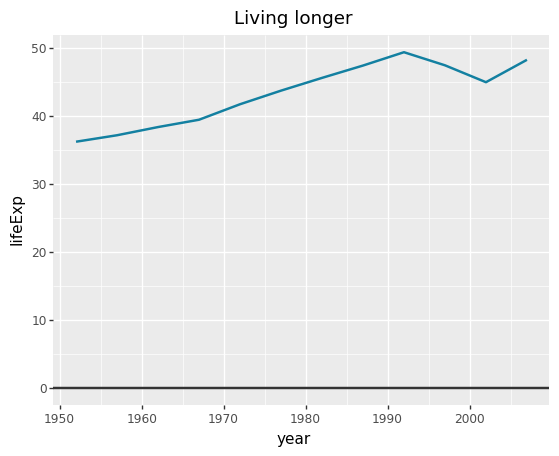

<ggplot: (-9223371941310406772)>

In [7]:
(ggplot(line_df, aes(x='year', y='lifeExp')) +
 geom_line(colour='#1380A1', size=1) +
 geom_hline(yintercept = 0, size = 1, colour='#333333') +
 labs(title='Living longer', 
     subtitle = 'Life expectancy in Malawi 1952-2007')
 )

In [8]:
## altair
line = (alt.Chart(line_df).mark_line().encode(
x='year',
y='lifeExp')
.properties(title={'text': 'Living Longer',
                   'subtitle': 'Life expectancy in Malawi 1952-2007'})
) 

# hline
overlay = overlay = pd.DataFrame({'y': [0]})
hline = alt.Chart(overlay).mark_rule(color='#333333', strokeWidth=3).encode(y='y:Q')

line + hline

alt.LayerChart(...)

# The BBC style
```R
function () 
{
    font <- "Helvetica"
    ggplot2::theme(plot.title = ggplot2::element_text(family = font, 
    size = 28, face = "bold", color = "#222222"), plot.subtitle = ggplot2::element_text(family = font, 
    size = 22, margin = ggplot2::margin(9, 0, 9, 0)), plot.caption = ggplot2::element_blank(), 
    legend.position = "top", legend.text.align = 0, legend.background = ggplot2::element_blank(), 
    legend.title = ggplot2::element_blank(), legend.key = ggplot2::element_blank(), 
    legend.text = ggplot2::element_text(family = font, size = 18, 
        color = "#222222"), axis.title = ggplot2::element_blank(), 
    axis.text = ggplot2::element_text(family = font, size = 18, 
        color = "#222222"), axis.text.x = ggplot2::element_text(margin = ggplot2::margin(5, 
        b = 10)), axis.ticks = ggplot2::element_blank(), 
    axis.line = ggplot2::element_blank(), panel.grid.minor = ggplot2::element_blank(), 
    panel.grid.major.y = ggplot2::element_line(color = "#cbcbcb"), 
    panel.grid.major.x = ggplot2::element_blank(), panel.background = ggplot2::element_blank(), 
    strip.background = ggplot2::element_rect(fill = "white"), 
    strip.text = ggplot2::element_text(size = 22, hjust = 0))
    }
    <environment: namespace:bbplot>
```

In [54]:
legend_text_align

NameError: name 'legend_text_align' is not defined

In [87]:
def bbc_style():
    font = "Helvetica"
    t = theme(plot_title=element_text(family=font,
                                      size=28, face="bold", color="#222222"),
              #       plot_subtitle=element_text(family=font,
              #                                  size=22, plot_margin=(9, 0, 9, 0)), plot_caption=element_blank(),
              legend_position="top", legend_title_align=0, legend_background=element_blank(),
              legend_title=element_blank(), legend_key=element_blank(),
              legend_text=element_text(family=font, size=18,
                                       color="#222222"), axis_title=element_blank(),

              axis_text=element_text(family=font, size=18,
                                     color="#222222"),
              axis_text_x=element_text(margin={'t': 5, 'b': 10}),
              axis_ticks=element_blank(),
              axis_line=element_blank(), panel_grid_minor=element_blank(),
              panel_grid_major_y=element_line(color="#cbcbcb"),
              panel_grid_major_x=element_blank(), panel_background=element_blank(),
              strip_background=element_rect(fill="white"),
              strip_text=element_text(size=22, hjust=0)
              )
    return t

In [89]:
font = "Helvetica"
theme(plot_title=element_text(family=font,
                                      size=28, face="bold", color="#222222"),
              #       plot_subtitle=element_text(family=font,
              #                                  size=22, plot_margin=(9, 0, 9, 0)), plot_caption=element_blank(),
              legend_position="top", legend_title_align=0, legend_background=element_blank(),
              legend_title=element_blank(), legend_key=element_blank(),
              legend_text=element_text(family=font, size=18,
                                       color="#222222"), axis_title=element_blank(),

              axis_text=element_text(family=font, size=18,
                                     color="#222222"),
              axis_text_x=element_text(margin={'t': 5, 'b': 10}),
              axis_ticks=element_blank(),
              axis_line=element_blank(), panel_grid_minor=element_blank(),
              panel_grid_major_y=element_line(color="#cbcbcb"),
              panel_grid_major_x=element_blank(), panel_background=element_blank(),
              strip_background=element_rect(fill="white"),
              strip_text=element_text(size=22, hjust=0)
              )

The `finalise_plot()` function does more than just save out your chart, it also left-aligns the title and subtitle as is standard for BBC graphics, adds a footer with the logo on the right side and lets you input source text on the left side.

## altair

In [90]:
## altair
line = (alt.Chart(line_df).mark_line().encode(
x='year',
y='lifeExp')
.properties(title={'text': 'Living Longer',
                   'subtitle': 'Life expectancy in China 1952-2007'})
) 

# hline
overlay = overlay = pd.DataFrame({'lifeExp': [0]})
hline = alt.Chart(overlay).mark_rule(color='#333333', strokeWidth=3).encode(y='lifeExp:Q')

line + hline

alt.LayerChart(...)

# Make a multiple line chart

In [91]:
# hide
# Prepare data
multiline_df = gapminder.query(
    'country == "China" | country =="United States" ')

## ggplot

```r
#Prepare data
multiple_line_df <- gapminder %>%
  filter(country == "China" | country == "United States") 

#Make plot
multiple_line <- ggplot(multiple_line_df, aes(x = year, y = lifeExp, colour = country)) +
  geom_line(size = 1) +
  geom_hline(yintercept = 0, size = 1, colour="#333333") +
  scale_colour_manual(values = c("#FAAB18", "#1380A1")) +
  bbc_style() +
  labs(title="Living longer",
       subtitle = "Life expectancy in China and the US")
```

## plotnine

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


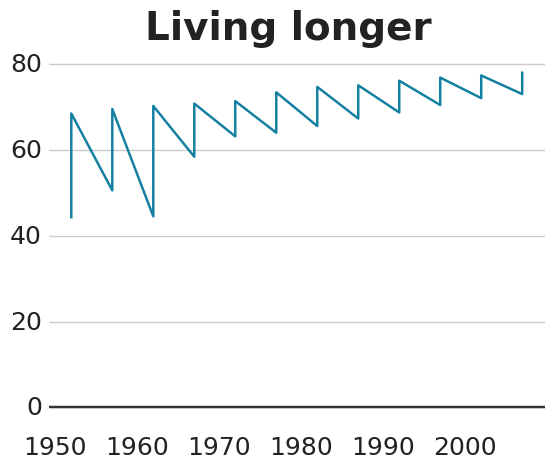

<ggplot: (-9223371941310014864)>

In [92]:
# Make plot
multiline = (
    ggplot(multiline_df, aes(x='year', y='lifeExp', colour='country')) +
    geom_line(colour="#1380A1", size=1) +
    geom_hline(yintercept=0, size=1, color="#333333") +
    scale_colour_manual(values=["#FAAB18", "#1380A1"]) +
      bbc_style() +
    labs(title="Living longer",
         subtitle="Life expectancy in China 1952-2007"))
multiline

## altair

In [12]:
multiline_altair = (alt.Chart(multiline_df).mark_line().encode(
x='year',
y='lifeExp',
color='country')
.properties(title={'text': 'Living Longer',
                   'subtitle': 'Life expectancy in China 1952-2007'})
) 

# hline
overlay = overlay = pd.DataFrame({'lifeExp': [0]})
hline = alt.Chart(overlay).mark_rule(color='#333333', strokeWidth=3).encode(y='lifeExp:Q')

multiline_altair + hline

alt.LayerChart(...)

# Make a bar chart

# ggplot
```r
#Prepare data
bar_df <- gapminder %>%
  filter(year == 2007 & continent == "Africa") %>%
  arrange(desc(lifeExp)) %>%
  head(5)

#Make plot
bars <- ggplot(bar_df, aes(x = country, y = lifeExp)) +
  geom_bar(stat="identity", 
           position="identity", 
           fill="#1380A1") +
  geom_hline(yintercept = 0, size = 1, colour="#333333") +
  bbc_style() +
  labs(title="Reunion is highest",
       subtitle = "Highest African life expectancy, 2007")
```

In [13]:
## hide
bar_df = gapminder.query(' year == 2007 & continent == "Africa" ').nlargest(5, 'lifeExp')

## plotnine

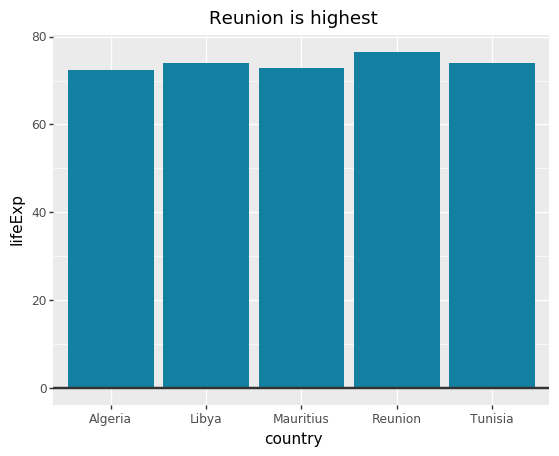

<ggplot: (-9223371941310355340)>

In [14]:
bars_ggplot = (ggplot(bar_df, aes(x='country', y='lifeExp')) +
  geom_bar(stat="identity",
           position="identity",
           fill="#1380A1") +
  geom_hline(yintercept=0, size=1, colour="#333333") +
#   bbc_style() +
  labs(title="Reunion is highest",
       subtitle="Highest African life expectancy, 2007"))

bars_ggplot

## altair

In [15]:
bars_altair = (alt.Chart(bar_df).mark_bar().encode(
x='country',
y='lifeExp',
# color='country'
)
.properties(title={'text': 'Reunion is highest',
                   'subtitle': 'Highest African life expectancy, 2007'})
) 

bars_altair

alt.Chart(...)

# Make a stacked bar chart

## Data preprocessing

In [16]:
## collapse-hide
stacked_bar_df = (
    gapminder.query(' year == 2007')
    .assign(
        lifeExpGrouped=lambda x: pd.cut(
            x['lifeExp'],
            bins=[0, 50, 65, 80, 90],
            labels=["under 50", "50-65", "65-80", "80+"]))
    .groupby(
        ['continent', 'lifeExpGrouped'], as_index=True)
    .agg({'pop': 'sum'})
    .rename(columns={'pop': 'continentPop'})
    .reset_index()
)
stacked_bar_df['lifeExpGrouped'] = pd.Categorical(stacked_bar_df['lifeExpGrouped'], ordered=True)

stacked_bar_df.head(6)

,continent,lifeExpGrouped,continentPop
0,Africa,under 50,376100713.0
1,Africa,50-65,386811458.0
2,Africa,65-80,166627521.0
3,Africa,80+,NaN
4,Americas,under 50,NaN
5,Americas,50-65,8502814.0


## ggplot
```r
#prepare data
stacked_df <- gapminder %>% 
  filter(year == 2007) %>%
  mutate(lifeExpGrouped = cut(lifeExp, 
                    breaks = c(0, 50, 65, 80, 90),
                    labels = c("Under 50", "50-65", "65-80", "80+"))) %>%
  group_by(continent, lifeExpGrouped) %>%
  summarise(continentPop = sum(as.numeric(pop)))

#set order of stacks by changing factor levels
stacked_df$lifeExpGrouped = factor(stacked_df$lifeExpGrouped, levels = rev(levels(stacked_df$lifeExpGrouped)))

#create plot
stacked_bars <- ggplot(data = stacked_df, 
                       aes(x = continent,
                           y = continentPop,
                           fill = lifeExpGrouped)) +
  geom_bar(stat = "identity", 
           position = "fill") +
  bbc_style() +
  scale_y_continuous(labels = scales::percent) +
  scale_fill_viridis_d(direction = -1) +
  geom_hline(yintercept = 0, size = 1, colour = "#333333") +
  labs(title = "How life expectancy varies",
       subtitle = "% of population by life expectancy band, 2007") +
  theme(legend.position = "top", 
        legend.justification = "left") +
  guides(fill = guide_legend(reverse = TRUE))
```

## plotnine

C:\Users\CHANNO.OOCLDM\AppData\Local\Continuum\anaconda3\lib\site-packages\plotnine\scales\scale.py:91: PlotnineWarning: scale_fill_cmap_d could not recognise parameter `direction`
  warn(msg.format(self.__class__.__name__, k), PlotnineWarning)
C:\Users\CHANNO.OOCLDM\AppData\Local\Continuum\anaconda3\lib\site-packages\plotnine\layer.py:433: PlotnineWarning: position_stack : Removed 7 rows containing missing values.
  data = self.position.setup_data(self.data, params)


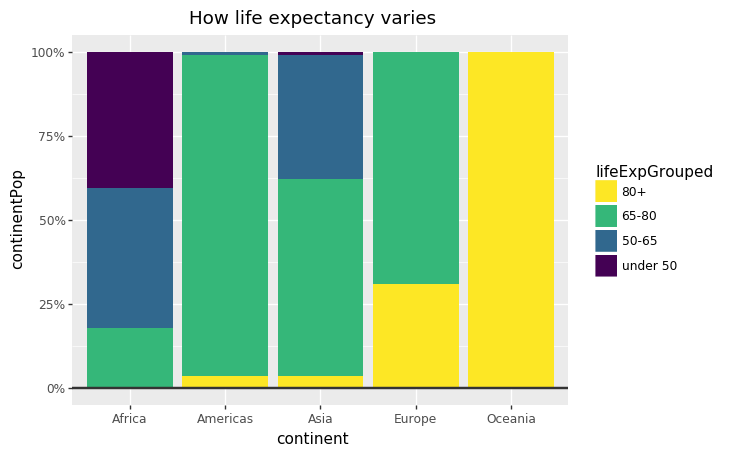

<ggplot: (-9223371941310320660)>

In [17]:
# create plot
stacked_bar_ggplot = (
    ggplot(stacked_bar_df,
           aes(x='continent',
               y='continentPop',
               fill='lifeExpGrouped')
           ) +
    geom_bar(stat="identity",
             position="fill") +
    #   bbc_style() +
    scale_y_continuous(labels=lambda l: ["%d%%" % (v * 100) for v in l]) +
    scale_fill_cmap_d(direction=-1) +  # scale_fill_viridis_d
    geom_hline(yintercept=0, size=1, colour="#333333") +
    labs(title="How life expectancy varies",
         subtitle="% of population by life expectancy band, 2007") +

    guides(fill=guide_legend(reverse=True)))

stacked_bar_ggplot

C:\Users\CHANNO.OOCLDM\AppData\Local\Continuum\anaconda3\lib\site-packages\plotnine\scales\scale.py:91: PlotnineWarning: scale_fill_cmap_d could not recognise parameter `direction`
  warn(msg.format(self.__class__.__name__, k), PlotnineWarning)
C:\Users\CHANNO.OOCLDM\AppData\Local\Continuum\anaconda3\lib\site-packages\plotnine\layer.py:433: PlotnineWarning: position_stack : Removed 7 rows containing missing values.
  data = self.position.setup_data(self.data, params)


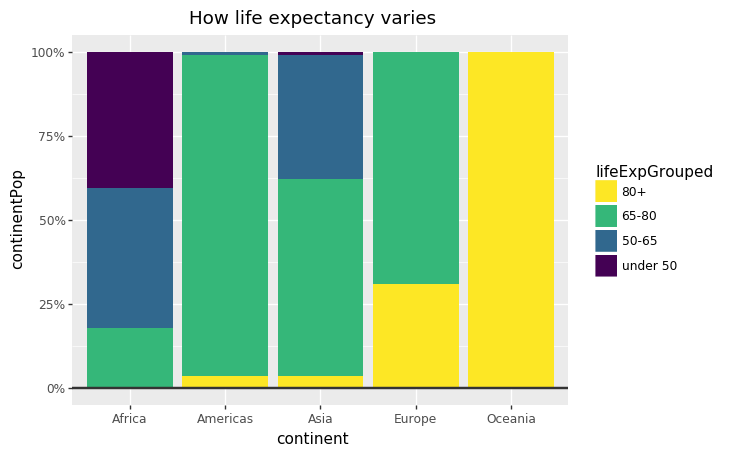

<ggplot: (-9223371941310406808)>

In [18]:
# create plot
stacked_bar_ggplot = (
    ggplot(stacked_bar_df,
           aes(x='continent',
               y='continentPop',
               fill='lifeExpGrouped')
           ) +
    geom_bar(stat="identity",
             position="fill") +
    #   bbc_style() +
    scale_y_continuous(labels=lambda l: ["%d%%" % (v * 100) for v in l]) +
    scale_fill_cmap_d(direction=-1) +  # scale_fill_viridis_d
    geom_hline(yintercept=0, size=1, colour="#333333") +
    labs(title="How life expectancy varies",
         subtitle="% of population by life expectancy band, 2007") +

    guides(fill=guide_legend(reverse=True)))

stacked_bar_ggplot

## altair

In [19]:
stacked_bar_altair = (
    alt.Chart(stacked_bar_df)
    .mark_bar()
    .encode(x='continent',
            y=alt.Y('continentPop', stack='normalize',
                    axis=alt.Axis(format='%')),
            fill=alt.Fill('lifeExpGrouped', scale=alt.Scale(scheme='viridis')))
    .properties(title={'text': 'How life expectancy varies',
                       'subtitle': '% of population by life expectancy band, 2007'}
                )
)

overlay = overlay = pd.DataFrame({'continentPop': [0]})
hline = alt.Chart(overlay).mark_rule(
    color='#333333', strokeWidth=2).encode(y='continentPop:Q')


stacked_bar_altair + hline

alt.LayerChart(...)

# Make a grouped bar chart

In [20]:
# hide
grouped_bar_df = (
    gapminder[[
        'country', 'year', 'lifeExp'
    ]].query(' year == 1967 | year == 2007 ')
    .pivot_table(
        index=['country'], columns='year',
        values='lifeExp')
    .assign(gap=lambda x: x[2007] - x[1967])
    .nlargest(5, 'gap')
    .reset_index()
    .melt(value_vars=[1967, 2007],
          id_vars=['country', 'gap'],
      value_name='lifeExp')
)

grouped_bar_df

,country,gap,year,lifeExp
0,Oman,28.652,1967,46.988
1,Vietnam,26.411,1967,47.838
2,"Yemen, Rep.",25.714,1967,36.984
3,Indonesia,24.686,1967,45.964
4,Libya,23.725,1967,50.227
5,Oman,28.652,2007,75.640
6,Vietnam,26.411,2007,74.249
7,"Yemen, Rep.",25.714,2007,62.698
8,Indonesia,24.686,2007,70.650
9,Libya,23.725,2007,73.952


## ggplot
```r
#Prepare data
grouped_bar_df <- gapminder %>%
  filter(year == 1967 | year == 2007) %>%
  select(country, year, lifeExp) %>%
  spread(year, lifeExp) %>%
  mutate(gap = `2007` - `1967`) %>%
  arrange(desc(gap)) %>%
  head(5) %>%
  gather(key = year, 
         value = lifeExp,
         -country,
         -gap) 
  
#Make plot
grouped_bars <- ggplot(grouped_bar_df, 
                       aes(x = country, 
                           y = lifeExp, 
                           fill = as.factor(year))) +
  geom_bar(stat="identity", position="dodge") +
  geom_hline(yintercept = 0, size = 1, colour="#333333") +
  bbc_style() +
  scale_fill_manual(values = c("#1380A1", "#FAAB18")) +
  labs(title="We're living longer",
       subtitle = "Biggest life expectancy rise, 1967-2007")
```

## plotnine

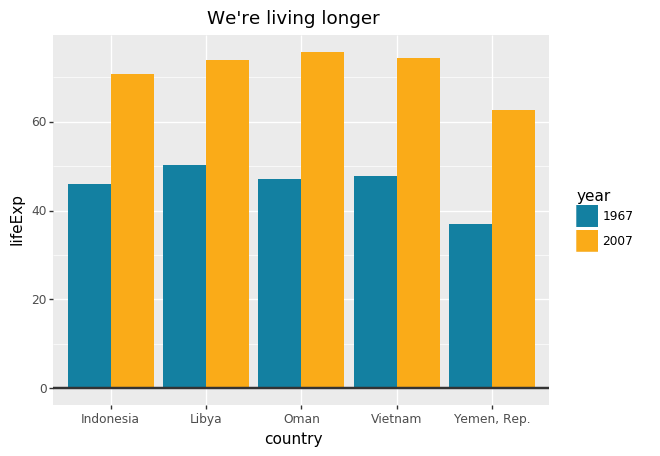

<ggplot: (-9223371941310352504)>

In [21]:
# Make plot
grouped_bars_ggplot = (ggplot(grouped_bar_df,
                       aes(x='country',
                           y='lifeExp',
                           fill='year')) +
                geom_bar(stat="identity", position="dodge") +
                geom_hline(yintercept=0, size=1, colour="#333333") +
#                 bbc_style() +
                scale_fill_manual(values=("#1380A1", "#FAAB18")) +
                labs(title="We're living longer",
                     subtitle="Biggest life expectancy rise, 1967-2007"))

grouped_bars_ggplot

## altair

In [22]:
grouped_bars_altair = (
    alt.Chart(grouped_bar_df)
    .mark_bar()
    .encode(x='year:N',
            y='lifeExp',
color=alt.Color('year:N', scale=alt.Scale(range=["#1380A1", "#FAAB18"])),
           column='country:N')
    .properties(title={'text': "We're living longe",
                       'subtitle': 'Biggest life expectancy rise, 1967-2007'}
                )
)

grouped_bars_altair

alt.Chart(...)

# Make changes to the legend

In [23]:
## hide

## plotnine

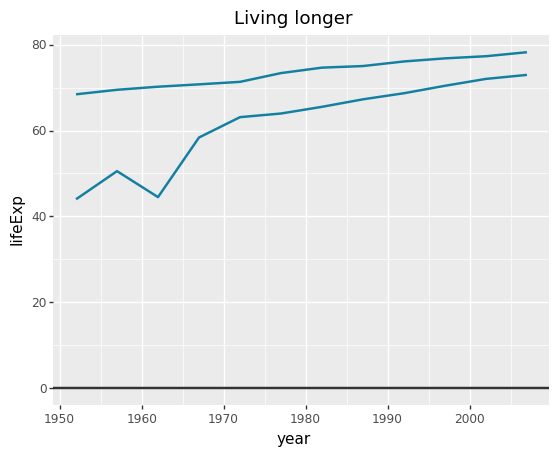

<ggplot: (-9223371941310211164)>

In [28]:
# Remove the Legend
multiline + guides(colour=False)

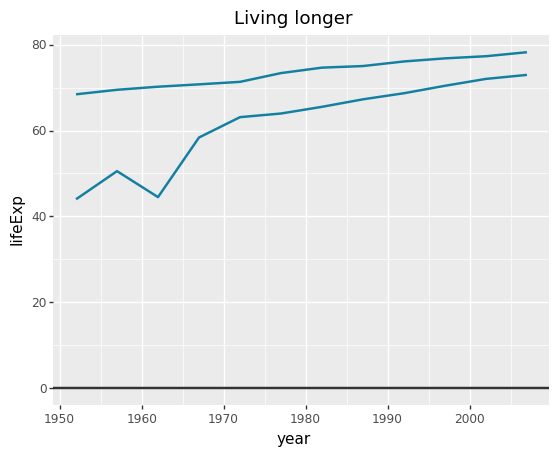

<ggplot: (-9223371941308840576)>

In [33]:
multiline + theme(legend_position = "none")

In [43]:
from plotnine import unit

ImportError: cannot import name 'unit' from 'plotnine' (C:\Users\CHANNO.OOCLDM\AppData\Local\Continuum\anaconda3\lib\site-packages\plotnine\__init__.py)

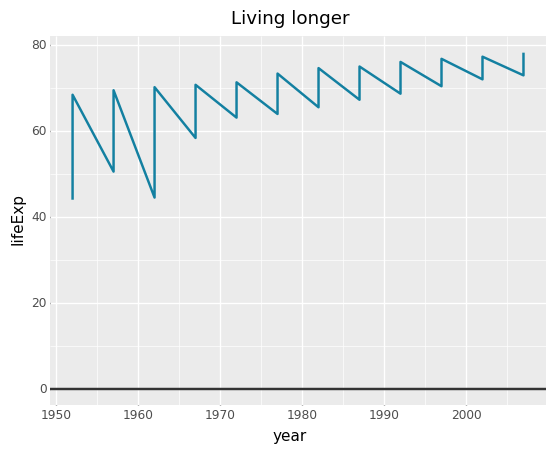

<ggplot: (-9223371941310025320)>

In [51]:
# Change position of the legend
x=multiline + theme(
  axis_ticks_major_x = element_line(color = "#333333"), 
  axis_ticks_length =  0.26)

x

## altair

# Make changes to the axes

In [72]:
## hide

## ggplot
```r

```

## plotnine

## altair

# Add annotations

In [73]:
## hide

## ggplot
```r

```

## plotnine

## altair

# Work with small multiples

In [74]:
## hide

## ggplot
```r

```

## plotnine

## altair

# Do something else entirely

In [75]:
## hide

## ggplot
```r

```

## plotnine

## altair

# Make a dumbbell chart

In [133]:
# hide
dumbbell_chart_df = (
    gapminder[[
        'country', 'year', 'lifeExp'
    ]].query(' year == 1967 | year == 2007 ')
    .pivot_table(
        index=['country'], columns='year',
        values='lifeExp')
    .assign(gap=lambda x: x[2007] - x[1967])
    .nlargest(10, 'gap')
)

dumbbell_chart_df

year,1967,2007,gap
country,,,
Oman,46.988,75.640,28.652
Vietnam,47.838,74.249,26.411
"Yemen, Rep.",36.984,62.698,25.714
Indonesia,45.964,70.650,24.686
Libya,50.227,73.952,23.725
Gambia,35.857,59.448,23.591
Saudi Arabia,49.901,72.777,22.876
Nepal,41.472,63.785,22.313
Egypt,49.293,71.338,22.045


## ggplot
```r
#Prepare data
dumbbell_df <- gapminder %>%
  filter(year == 1967 | year == 2007) %>%
  select(country, year, lifeExp) %>%
  spread(year, lifeExp) %>%
  mutate(gap = `2007` - `1967`) %>%
  arrange(desc(gap)) %>%
  head(10)

ggplot(hist_df, aes(lifeExp)) +
  geom_histogram(binwidth = 5, colour = "white", fill = "#1380A1") +
  geom_hline(yintercept = 0, size = 1, colour="#333333") +
  bbc_style() +
  scale_x_continuous(limits = c(35, 95),
                     breaks = seq(40, 90, by = 10),
                     labels = c("40", "50", "60", "70", "80", "90 years")) +
  labs(title = "How life expectancy varies",
       subtitle = "Distribution of life expectancy in 2007")
```

## plotnine

Not available with `plotnine`.

## altair

In [139]:
dumbbell_chart_altair = (
alt.Chart(dumbbell_chart_df).
    mark_rule()
)

dumbbell_chart_altair

()